In [ ]:
# In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

# Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

# ➡️ Dataset link

# https://i.imgur.com/hv2Ynyn.jpg

# ➡️ Columns explanation


# Instructions

# Part1: supervised learning

# Import you data and perform basic data exploration phase
# Display general information about the dataset
# Create a pandas profiling reports to gain insights into the dataset
# Handle Missing and corrupted values
# Remove duplicates, if they exist
# Handle outliers, if they exist
# Encode categorical features
# Prepare your dataset for the modelling phase
# Apply Decision tree, and plot its ROC curve
# Try to improve your model performance by changing the model hyperparameters
# Part2: unsupervised learning

# Drop out the target variable
# Apply K means clustering and plot the clusters
# Find the optimal K parameter
# Interpret the results

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
malware = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')

In [ ]:
malware.shape

(100000, 10)

In [ ]:
malware.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [ ]:
malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [ ]:
malware.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [ ]:
malware.duplicated().sum()

79581

In [ ]:
malware.drop_duplicates(inplace=True)

In [ ]:
malware.duplicated().sum()

0

In [ ]:
malware.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  1405
Census_IsVirtualDevice         169
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                       471
SMode                         3670
IsProtected                    343
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [ ]:
malware['IsProtected'] = malware['IsProtected'].fillna(malware['IsProtected'].mode()[0])

In [ ]:
for col in malware.select_dtypes('number'):
  malware[col] = malware[col].fillna(malware[col].mean())

In [ ]:
for col in malware.select_dtypes('number'):
  malware[col] = malware[col].fillna(malware[col].mean())

In [ ]:
for col in malware.select_dtypes('object'):
  le = LabelEncoder()
  malware[col] = le.fit_transform(malware[col])

In [ ]:
malware['IsProtected'].value_counts()

IsProtected
1.0    16831
0.0     3588
Name: count, dtype: int64

In [ ]:
from scipy.stats import zscore
zscore(malware).describe()
malware = malware[np.abs(zscore(malware)) < 3]

In [ ]:
malware

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.000000,0.0,11,0,1.0,0.000000,1.0,4,29
1,0,0.000000,0.0,11,0,1.0,0.000000,1.0,4,93
2,0,0.000000,0.0,1,0,1.0,0.000000,1.0,4,86
3,1,0.000000,0.0,11,0,1.0,0.000000,1.0,4,88
4,1,0.000000,0.0,1,0,1.0,0.000000,1.0,4,18
...,...,...,...,...,...,...,...,...,...,...
99926,0,1.000000,0.0,11,0,1.0,0.001911,0.0,4,115
99927,0,1.000000,0.0,1,1,1.0,0.000000,1.0,4,142
99943,0,1.000000,0.0,1,1,1.0,0.000000,1.0,4,214
99947,1,0.331545,0.0,11,0,1.0,0.000000,1.0,6,107


In [ ]:

malware.isna().sum()

HasDetections                    0
Wdft_IsGamer                     0
Census_IsVirtualDevice         499
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1546
SMode                           32
IsProtected                      0
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [ ]:
malware['Census_IsVirtualDevice'] = malware['Census_IsVirtualDevice'].fillna(malware['Census_IsVirtualDevice'].mode()[0])

In [ ]:
malware['Firewall'] = malware['Firewall'].fillna(malware['Firewall'].mode()[0])

In [ ]:
malware['SMode'] = malware['SMode'].fillna(malware['SMode'].mode()[0])

In [ ]:




malware.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.0,0.0,1,0,1.0,0.0,1.0,4,18


In [ ]:
x = malware.drop('IsProtected', axis=1)
y = malware['IsProtected']

In [ ]:
##Split your dataset to training and test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
##intro of scaling
scaler =  StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [ ]:
#Apply Decision tree, and plot its ROC curve


In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(xtrain, ytrain)
yPred = model.predict(xtest)

In [ ]:





y_probs = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

In [ ]:
malware.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

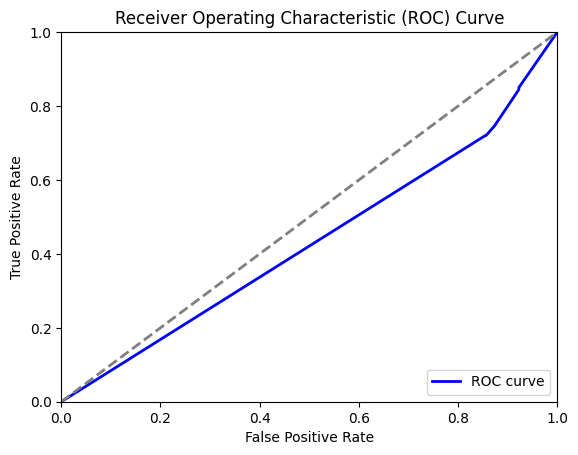

In [ ]:
 # Displaying the ROC curve using RocCurveDisplay
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:

auc_score = roc_auc_score(ytest, y_probs)
print(f'AUC Score: {auc_score}')

AUC Score: 0.4321308858039584


In [ ]:

model = DecisionTreeClassifier(splitter= 'random', max_depth= 5, min_samples_leaf= 5, max_leaf_nodes= 10)



Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

In [ ]:
malware.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.0,0.0,1,0,1.0,0.0,1.0,4,18


In [ ]:
print(malware.columns)

Index(['HasDetections', 'Wdft_IsGamer', 'Census_IsVirtualDevice',
       'Census_OSEdition', 'Census_HasOpticalDiskDrive', 'Firewall', 'SMode',
       'IsProtected', 'OsPlatformSubRelease', 'CountryIdentifier'],
      dtype='object')


In [ ]:
# Drop the target variable
malware_dropped = malware.drop(columns=['IsProtected'])


In [ ]:
malware_dropped

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,OsPlatformSubRelease,CountryIdentifier
0,0,0.000000,0.0,11,0,1.0,0.000000,4,29
1,0,0.000000,0.0,11,0,1.0,0.000000,4,93
2,0,0.000000,0.0,1,0,1.0,0.000000,4,86
3,1,0.000000,0.0,11,0,1.0,0.000000,4,88
4,1,0.000000,0.0,1,0,1.0,0.000000,4,18
...,...,...,...,...,...,...,...,...,...
99926,0,1.000000,0.0,11,0,1.0,0.001911,4,115
99927,0,1.000000,0.0,1,1,1.0,0.000000,4,142
99943,0,1.000000,0.0,1,1,1.0,0.000000,4,214
99947,1,0.331545,0.0,11,0,1.0,0.000000,6,107


In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(malware_dropped)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Apply K means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(malware_dropped) #fitting

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

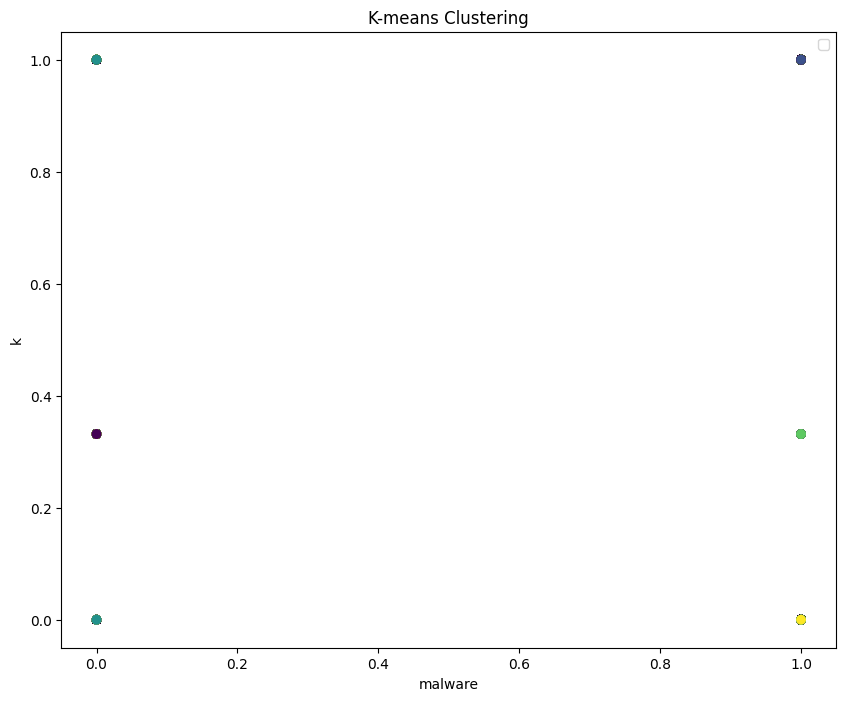

In [ ]:
#plot the clusters

# Add cluster labels to the DataFrame
malware['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))

# Convert malware_dropped back to a DataFrame for plotting
malware_dropped_df = pd.DataFrame(malware_dropped)

# Assuming we are using the first two features for visualization
plt.scatter(malware_dropped_df.iloc[:, 0], malware_dropped_df.iloc[:, 1], c=malware['Cluster'], cmap='viridis')


# Plotting the centroids
centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='x', s=200, label='Centroids')

plt.xlabel('malware')
plt.ylabel('k')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

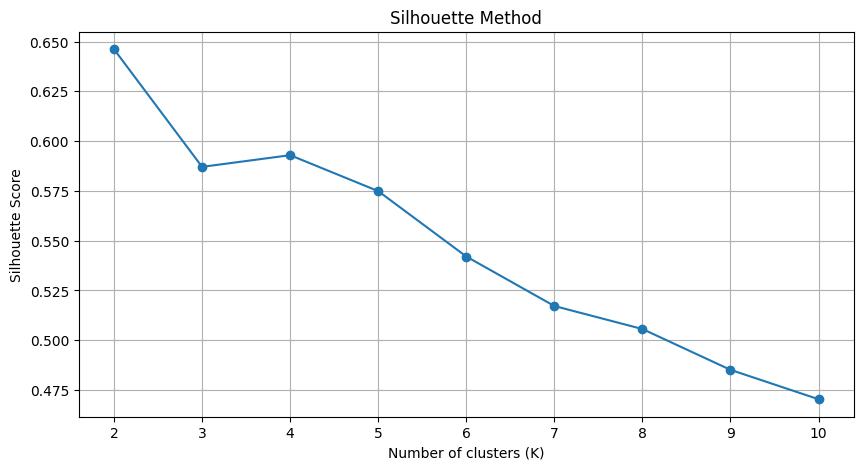

In [ ]:
#Silhouette Method.....Find the optimal K parameter
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(malware)
    score = silhouette_score(malware, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Print the optimal K.............#Interpret the results
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters (K) is: {optimal_k}')

The optimal number of clusters (K) is: 2


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(malware_dropped)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)